# Custom Data Creation

## Importing the libraries

In [35]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [36]:
# pyspark_df = spark.table("sd_bdc_demo.xgboost_regression.1_salesforce_updated_data")
# pyspark_df.display()
# df = pyspark_df.toPandas()

In [37]:
df = pd.read_csv("1_salesforce_updated_data/1_salesforce_updated_data.csv")


In [38]:
print(df.head())

   Sales_Order                 Stage  Amount  Probability    Sales_Person  \
0         5708           Closed Lost  255000            0  Alex Rodriguez   
1         5709       Decision Makers  315000           70   Sarah Johnson   
2         5710  Proposal/Price Quote  275000           65   Michael Chang   
3         5711            Closed Won  135000          100     Emma Wilson   
4         5712    Negotiation/Review  325000           85  David Martinez   

     Company_Industry              Contact_Title          Type  \
0          Healthcare           Medical Director  New Business   
1          Government                IT Director  New Business   
2  Financial Services  Client Relations Director  New Business   
3              Retail         Marketing Director  New Business   
4       Manufacturing            Quality Manager  New Business   

             Lead_Source State  days_to_close  
0  Healthcare Conference    WA             45  
1                    RFP    MT             9

In [39]:
print(df.columns)

Index(['Sales_Order', 'Stage', 'Amount', 'Probability', 'Sales_Person',
       'Company_Industry', 'Contact_Title', 'Type', 'Lead_Source', 'State',
       'days_to_close'],
      dtype='object')


## Plotting to define the condition

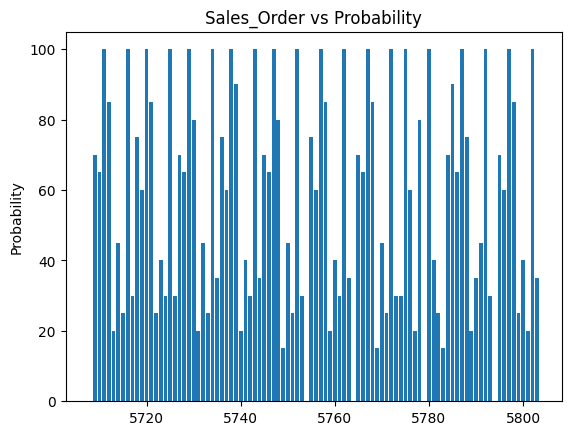

In [40]:
fig, ax = plt.subplots()

x_axis = df['Sales_Order']
y_axis = df['Probability']

ax.bar(x_axis, y_axis)

ax.set_ylabel('Probability')
ax.set_title('Sales_Order vs Probability')

plt.show()

    Sales_Order  Probability  Amount
0          5708            0  255000
1          5709           70  315000
2          5710           65  275000
3          5711          100  135000
4          5712           85  325000
..          ...          ...     ...
91         5799           25  475000
92         5800           40  115000
93         5801           20   95000
94         5802          100   68000
95         5803           35  185000

[96 rows x 3 columns]


C:\Users\LakshmanNavaneethakr\AppData\Local\Temp\ipykernel_25340\1835636422.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20')
C:\Users\LakshmanNavaneethakr\AppData\Local\Temp\ipykernel_25340\1835636422.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


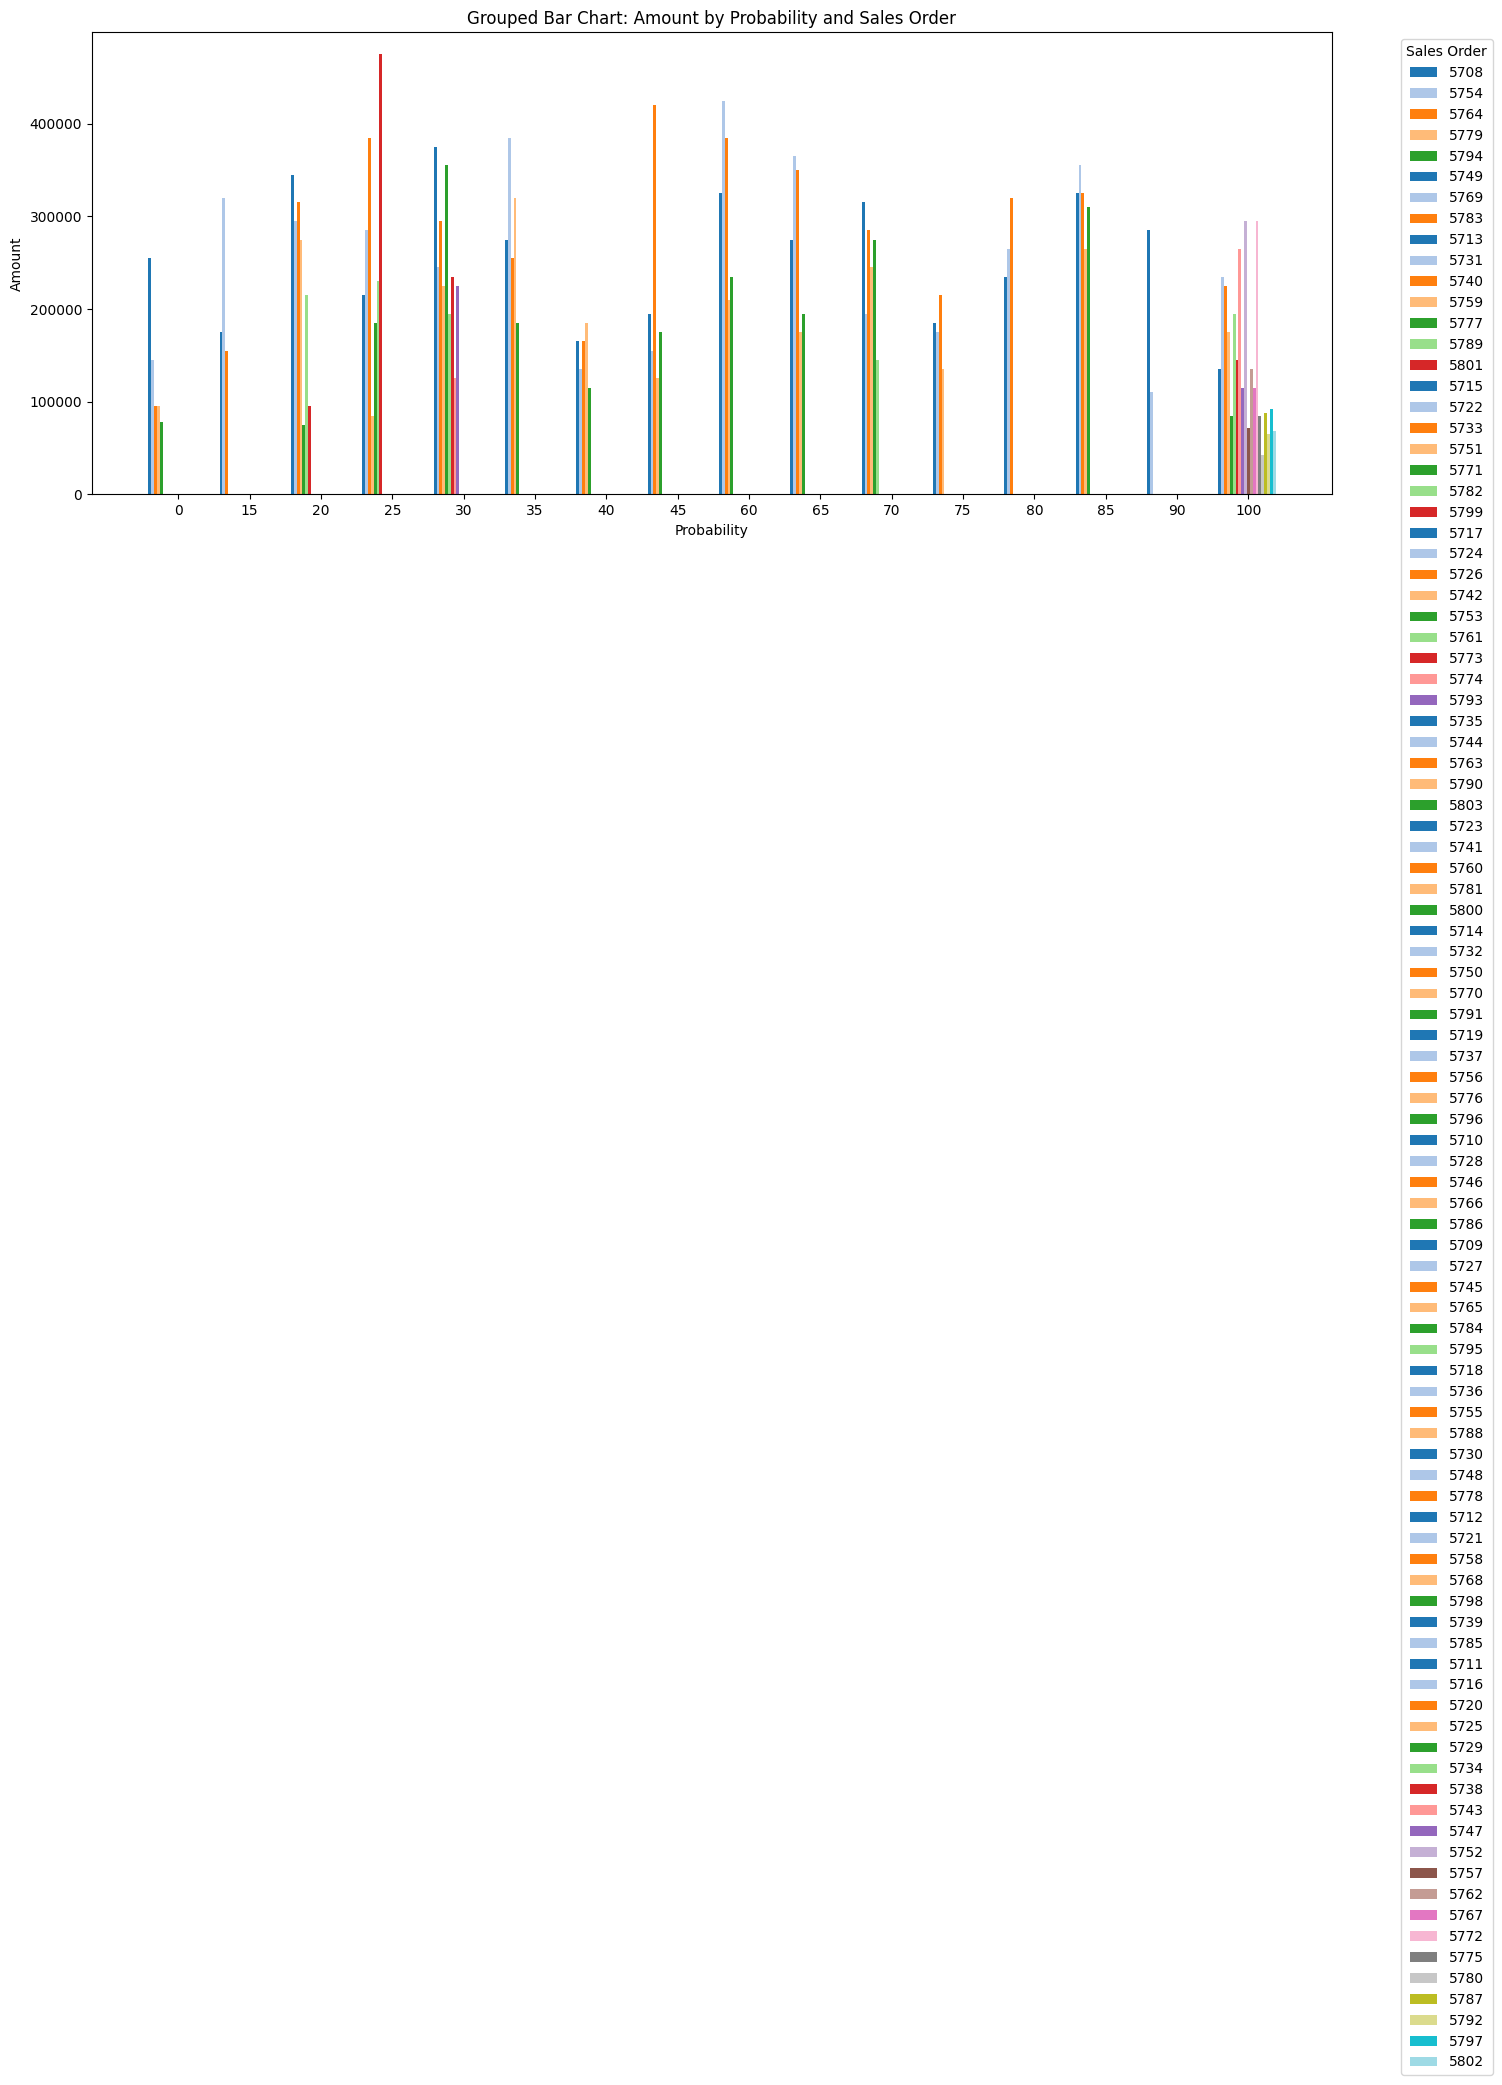

In [44]:
selected_cols = ['Sales_Order', 'Probability', 'Amount']
selected_cols_df = df[selected_cols]
print(selected_cols_df)

grouped = selected_cols_df.groupby('Probability')

probabilities = sorted(df['Probability'].unique())

max_group_size = max(grouped.size())

bar_width = 0.8 / max_group_size  # So bars stay within a group space
group_locs = np.arange(len(probabilities))  # Base x locations

fig, ax = plt.subplots(figsize=(16, 6))
colors = plt.cm.get_cmap('tab20')

added_labels = set()

for i, prob in enumerate(probabilities):
    group = grouped.get_group(prob)
    for j, (_, row) in enumerate(group.iterrows()):
        x = group_locs[i] + j * bar_width
        label = row['Sales_Order'] if row['Sales_Order'] not in added_labels else ""
        ax.bar(x, row['Amount'], width=bar_width, color=colors(j), label=label)
        added_labels.add(row['Sales_Order'])

ax.set_xticks(group_locs + (bar_width * max_group_size / 2))
ax.set_xticklabels(probabilities)
ax.set_xlabel("Probability")
ax.set_ylabel("Amount")
ax.set_title("Grouped Bar Chart: Amount by Probability and Sales Order")

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Sales Order", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Custom Number allocation for Closed Lost & Closed Won

In [27]:
mask = (df['Stage'].isin(['Closed Lost', 'Closed Won'])) & (df['Probability'].isin([0, 100]))
df.loc[mask, 'Probability'] = np.random.randint(30, 81, size=mask.sum())


## Export Updated Excel

In [28]:
# Create the folder if it doesn't exist
os.makedirs("2_salesforce_xgboost_updated_data", exist_ok=True)

# Save the Excel file inside the folder
df.to_csv("2_salesforce_xgboost_updated_data/2_salesforce_xgboost_updated_data.csv", index=False)


In [29]:
# spark_df = spark.createDataFrame(df)
# spark_df.write.mode("overwrite").saveAsTable("sd_bdc_demo.sarima_time_series_forecasting.2_salesforce_xgboost_updated_data")

## Plot the new custom table

In [ ]:
# pyspark_df = spark.table("sd_bdc_demo.xgboost_regression.2_salesforce_xgboost_updated_data")
# pyspark_df.display()
# df_new = pyspark_df.toPandas()

In [45]:
df_new = pd.read_csv("2_salesforce_xgboost_updated_data/2_salesforce_xgboost_updated_data.csv")


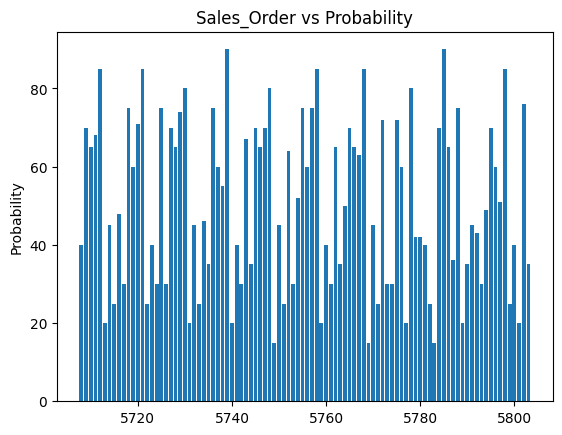

In [46]:
fig, ax = plt.subplots()

x_axis = df_new['Sales_Order']
y_axis = df_new['Probability']

ax.bar(x_axis, y_axis)

ax.set_ylabel('Probability')
ax.set_title('Sales_Order vs Probability')

plt.show()

    Sales_Order  Probability  Amount
0          5708           40  255000
1          5709           70  315000
2          5710           65  275000
3          5711           68  135000
4          5712           85  325000
..          ...          ...     ...
91         5799           25  475000
92         5800           40  115000
93         5801           20   95000
94         5802           76   68000
95         5803           35  185000

[96 rows x 3 columns]


C:\Users\LakshmanNavaneethakr\AppData\Local\Temp\ipykernel_25340\2551664752.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20')
C:\Users\LakshmanNavaneethakr\AppData\Local\Temp\ipykernel_25340\2551664752.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


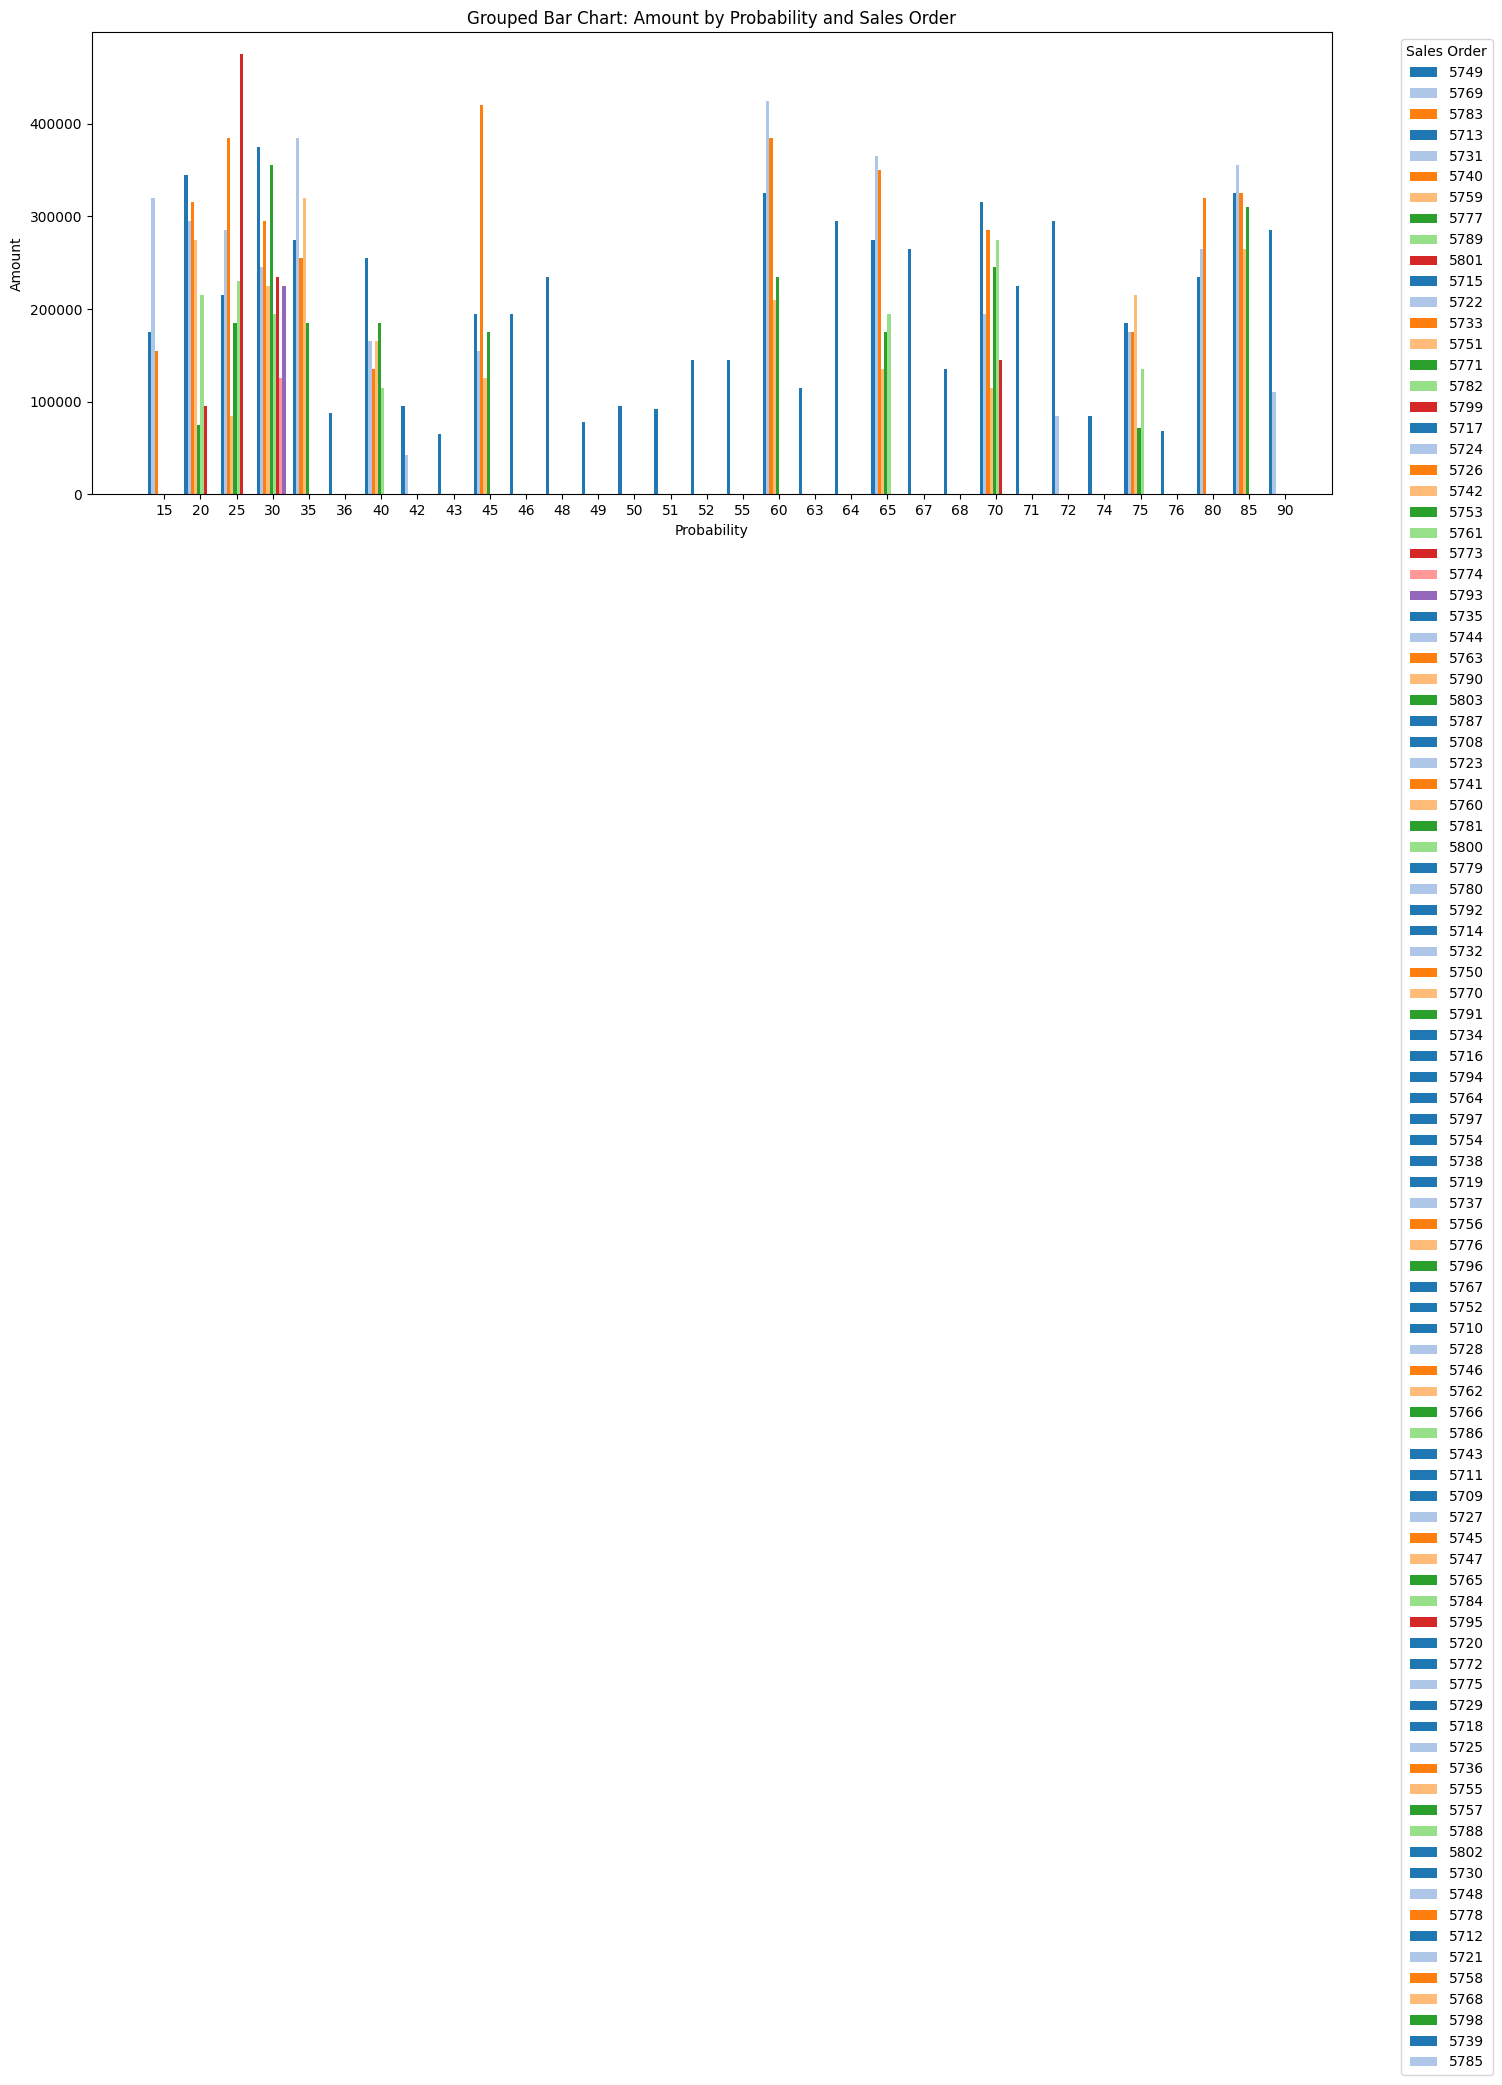

In [47]:
selected_cols = ['Sales_Order', 'Probability', 'Amount']
selected_cols_df = df_new[selected_cols]
print(selected_cols_df)

grouped = selected_cols_df.groupby('Probability')

probabilities = sorted(df_new['Probability'].unique())

max_group_size = max(grouped.size())

bar_width = 0.8 / max_group_size  # So bars stay within a group space
group_locs = np.arange(len(probabilities))  # Base x locations

fig, ax = plt.subplots(figsize=(16, 6))
colors = plt.cm.get_cmap('tab20')

added_labels = set()

for i, prob in enumerate(probabilities):
    group = grouped.get_group(prob)
    for j, (_, row) in enumerate(group.iterrows()):
        x = group_locs[i] + j * bar_width
        label = row['Sales_Order'] if row['Sales_Order'] not in added_labels else ""
        ax.bar(x, row['Amount'], width=bar_width, color=colors(j), label=label)
        added_labels.add(row['Sales_Order'])

ax.set_xticks(group_locs + (bar_width * max_group_size / 2))
ax.set_xticklabels(probabilities)
ax.set_xlabel("Probability")
ax.set_ylabel("Amount")
ax.set_title("Grouped Bar Chart: Amount by Probability and Sales Order")

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Sales Order", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
